In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

In [3]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Classes:", iris.target_names)

Feature shape: (150, 4)
Target shape: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y , test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 120
Test size: 30


In [6]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print("Train mean after scaling:", X_train_scaled.mean())
print("Train std after scaling:", X_train_scaled.std())

Train mean after scaling: -5.181040781584064e-17
Train std after scaling: 0.9999999999999999


In [9]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred=knn.predict(X_test_scaled)
accuracy=accuracy_score(y_test, y_pred)

print("Accuracy with k=3:", accuracy)

Accuracy with k=3: 1.0


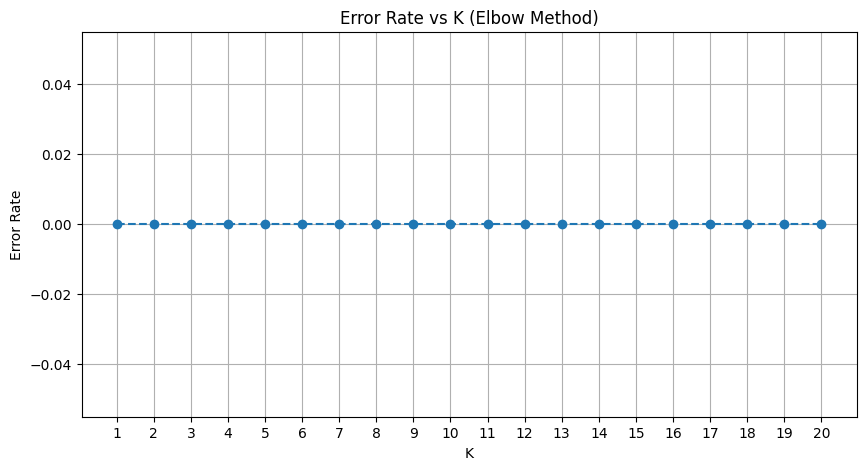

In [11]:
error_rate=[]

for k in range(1, 21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k=knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k !=y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='--')
plt.title('Error Rate vs K (Elbow Method)')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.xticks(range(1, 21))
plt.grid()
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

k_values=range(1, 21)
cv_scores=[]

for k in k_values:
    knn_cv=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

best_k=k_values[cv_scores.index(max(cv_scores))]

print("Cross-validation scores:", cv_scores)
print("Best K from cross-validation:", best_k)

Cross-validation scores: [np.float64(0.9416666666666668), np.float64(0.9333333333333333), np.float64(0.95), np.float64(0.9416666666666668), np.float64(0.925), np.float64(0.9333333333333333), np.float64(0.9416666666666668), np.float64(0.9416666666666668), np.float64(0.9416666666666668), np.float64(0.9416666666666668), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.9416666666666668), np.float64(0.95), np.float64(0.925), np.float64(0.9333333333333333), np.float64(0.9166666666666667), np.float64(0.9166666666666666), np.float64(0.9166666666666667)]
Best K from cross-validation: 3


In [13]:
knn_final=KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train_scaled, y_train)

y_pred_final=knn_final.predict(X_test_scaled)
final_accuracy=accuracy_score(y_test, y_pred_final)

print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 1.0
